<a href="https://colab.research.google.com/github/lahari-Durga/Moodmingle/blob/main/models/mood_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                       text   mood
0     Enjoying the stillness of the moment.   calm
1              Serenity surrounds me today.   calm
2  Everything feels overwhelming right now.    sad
3          Feeling calm and peaceful today.   calm
4  Life is beautiful and full of surprises.  happy
Unique moods: ['calm' 'sad' 'happy' 'excited' 'confused' 'angry' 'anxious']
Mood distribution:
 mood
excited     22
anxious     21
confused    19
sad         16
happy       15
calm        14
angry       13
Name: count, dtype: int64
              precision    recall  f1-score   support

       angry       1.00      0.50      0.67         2
     anxious       0.80      0.67      0.73         6
        calm       0.50      1.00      0.67         2
    confused       1.00      1.00      1.00         3
     excited       1.00      1.00      1.00         8
       happy       1.00      1.00      1.00         1
         sad       1.00      1.00      1.00         2

    accuracy                

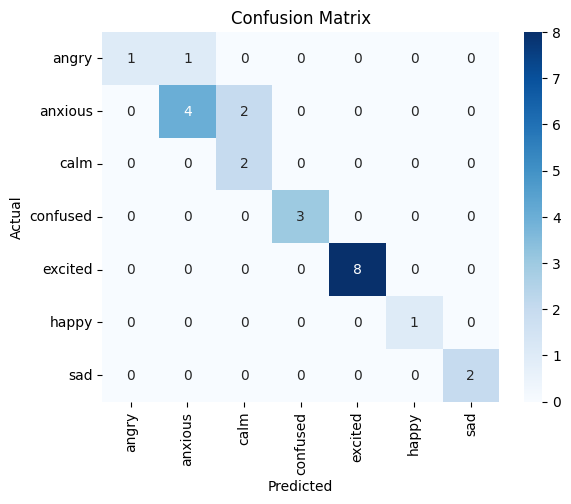

['vectorizer.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Step 1: Load your dataset
data = pd.read_csv("mood_dataset.csv")  # Expected columns: ['text', 'mood']

# Step 2: Basic data check
print(data.head())
print("Unique moods:", data['mood'].unique())
print("Mood distribution:\n", data['mood'].value_counts())

# Step 3: Preprocessing
X = data['text']
y = data['mood']

# Step 4: Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Save the model and vectorizer
joblib.dump(model, 'mood_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')